In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv('dataset.csv')
data.head()

,NumHAcceptors,NumHDonors,anchor_end_PA,anchor_end_SA,anchor_end_CA,anchor_end_BA,anchor_end_O,anchor_end_SiO,anchor_end_N,anchor_end_S,...,TPSA,MolLogP,PSA,control_PCE,MetalOxide_ITO,MetalOxide_NiOx,MetalOxide_SnO2,MetalOxide_TiO2,MetalOxide_ZnO,PCE
0,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.46,2.9722,134.93,19.90,0,1,0,0,0,22.40
1,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.92,2.9894,197.00,19.90,0,1,0,0,0,21.00
2,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.92,6.0760,287.91,20.10,0,1,0,0,0,25.60
3,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.26,0.3283,122.30,14.65,0,0,0,1,0,16.54
4,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.26,0.3283,107.98,14.65,0,0,0,1,0,16.88


In [2]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
from sklearn.model_selection import ShuffleSplit,train_test_split, GridSearchCV, KFold
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
x_train0, x_test0, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train0)
x_test = scaler.transform(x_test0)

In [3]:
import matplotlib.ticker as mticker
import matplotlib
from matplotlib.backends import backend_pdf
plt.rcParams.update({
                'font.size': 8,
                'axes.titlesize': 8,
                'axes.labelsize': 8,
                'lines.linewidth':0.75,
                'font.family': 'Helvetica',
                'pdf.fonttype': 42,
                'ps.fonttype': 42,
                'svg.fonttype': 'none'
            })

In [4]:
# LR
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression() 
LR_model.fit(x_train,y_train)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, LR_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, LR_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, LR_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, LR_model.predict(x_test))[0]}")

RMSE_train: 1.2137940554225919
R_train: 0.943669247795736
RMSE_test: 1.2782778910970671
R_test: 0.9360735984861831


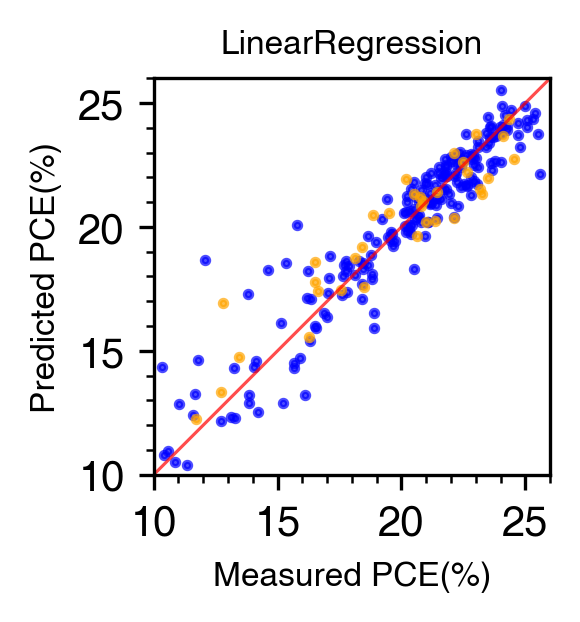

In [5]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, LR_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, LR_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7,linewidth=0.75)
ax.set_aspect('equal')
ax.set_title('LinearRegression')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [6]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, ridge.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, ridge.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, ridge.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, ridge.predict(x_test))[0]}")

RMSE_train: 1.214082642685643
R_train: 0.9436532891255869
RMSE_test: 1.2820452577327026
R_test: 0.9364666210308443


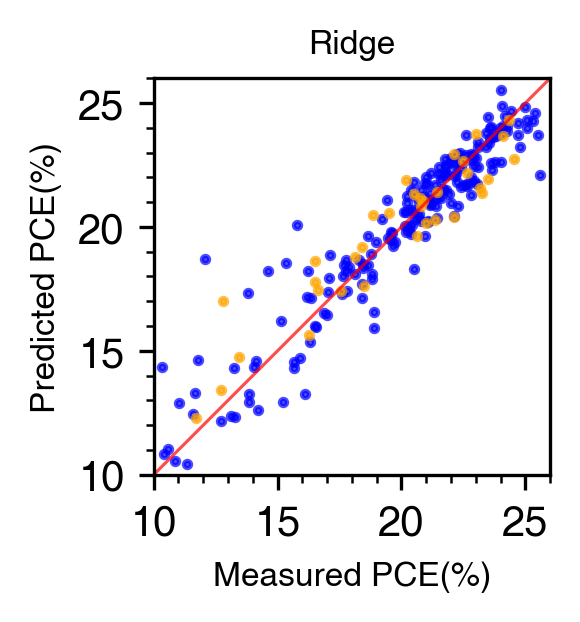

In [7]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, ridge.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, ridge.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('Ridge')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [8]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors':np.arange(1,100)}
knn= KNeighborsRegressor()
grid = GridSearchCV(knn, parameters, cv=10)
grid.fit(x_train,y_train)
KNN_model = grid.best_estimator_
print(grid.best_params_)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, KNN_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, KNN_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, KNN_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, KNN_model.predict(x_test))[0]}")

{'n_neighbors': 13}
RMSE_train: 2.2649674798446604
R_train: 0.8071543813902176
RMSE_test: 2.6089782064557805
R_test: 0.6936499181971779


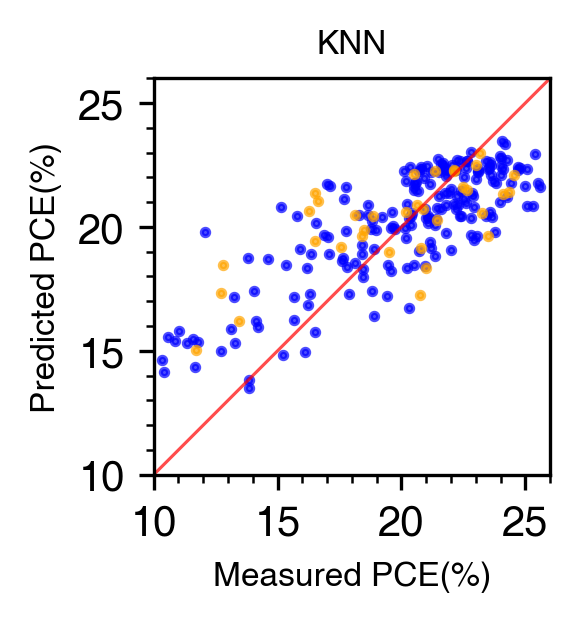

In [9]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, KNN_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, KNN_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('KNN')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [10]:
# SVR
from sklearn.svm import SVR
svm = SVR()
param_grid = {'C': [0.1,1], 'kernel': ['linear'],'gamma':[1e-2,1e-1],'degree':[1,3,5],'epsilon':[0.01,0.1]}
cross_Valid = KFold(n_splits=10, shuffle= True)
gs = GridSearchCV(estimator = svm, param_grid = param_grid, cv = 10,n_jobs =8,verbose=2)
gs.fit(x_train,y_train)
SVR_model = gs.best_estimator_
print(gs.best_params_)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, SVR_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, SVR_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, SVR_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, SVR_model.predict(x_test))[0]}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'C': 1, 'degree': 1, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
RMSE_train: 1.2717153286355276
R_train: 0.9397012567097249
RMSE_test: 1.4135891191537269
R_test: 0.9266803394616392


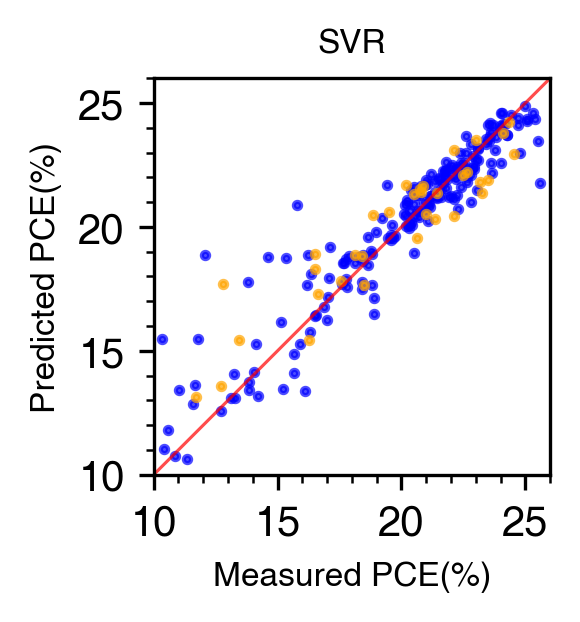

In [11]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, SVR_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, SVR_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('SVR')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [12]:
# RF
from sklearn.ensemble import RandomForestRegressor
n_estimators = [100, 50, 30]
max_features = [1.0]
max_depth = [4,5]
min_samples_split = [3,5]
min_samples_leaf = [1,2,3]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
cv = ShuffleSplit( n_splits=10,test_size=0.2, random_state=0)
rf = RandomForestRegressor()
gs=GridSearchCV(estimator=rf,param_grid=param_grid,cv=cv, verbose=2,n_jobs =8)
gs.fit(x_train, y_train)
rf_model = gs.best_estimator_
print(gs.best_params_)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, rf_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, rf_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, rf_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, rf_model.predict(x_test))[0]}")

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'bootstrap': True, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
RMSE_train: 0.9155351059419766
R_train: 0.9685359448748762
RMSE_test: 1.2055789269417794
R_test: 0.9379102478346929


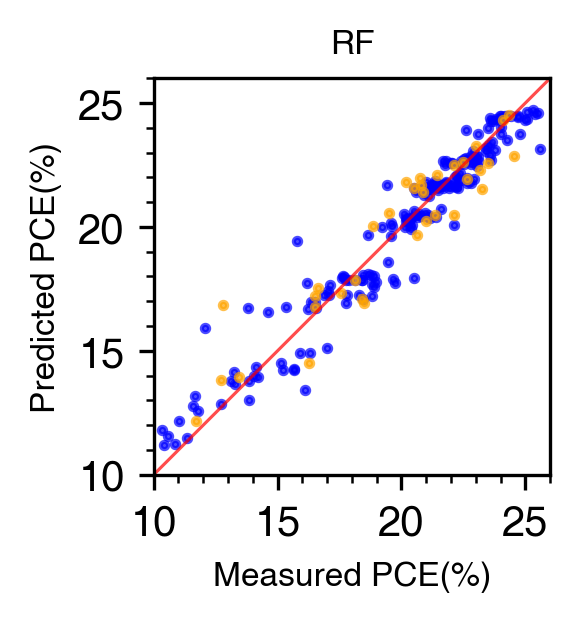

In [13]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, rf_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, rf_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('RF')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [14]:
# MLP
from sklearn.neural_network import MLPRegressor
mlp_clf__tuned_parameters = {"hidden_layer_sizes": [(64,16)],
                             "solver": ['adam'],
                             "max_iter": [1000],
                             "alpha": [0.0001,0.001],
                             "verbose": [False]
                             }
mlp = MLPRegressor(random_state=3)
estimator=GridSearchCV(mlp,mlp_clf__tuned_parameters,n_jobs=8,cv=10,verbose=0)
estimator.fit(x_train, y_train)
print(estimator.best_params_)
mlp_model = estimator.best_estimator_
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, mlp_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, mlp_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, mlp_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, mlp_model.predict(x_test))[0]}")

{'alpha': 0.001, 'hidden_layer_sizes': (64, 16), 'max_iter': 1000, 'solver': 'adam', 'verbose': False}
RMSE_train: 0.7312048964869766
R_train: 0.9799399669573065
RMSE_test: 1.8741562138991192
R_test: 0.8547148213285614


d:\anaconda3\envs\rdkit\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


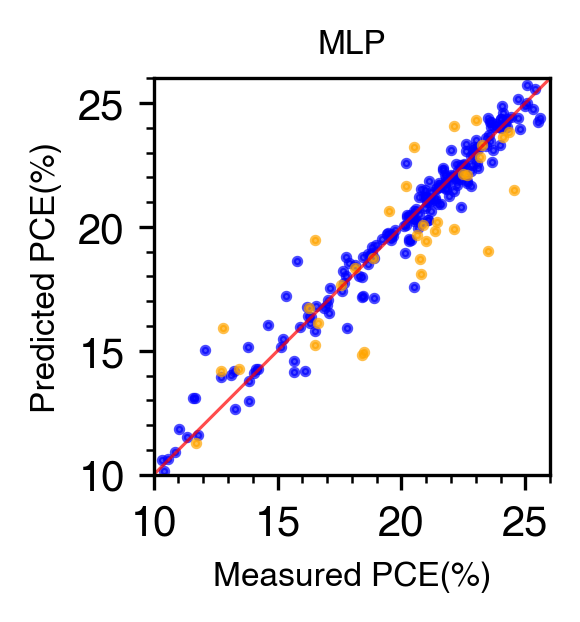

In [15]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, mlp_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, mlp_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('MLP')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [16]:
# lightGBM
from lightgbm import LGBMRegressor
param_test1 =  {'num_leaves': [10, 20, 30, 40, 50],
              'max_depth': [2, 4, 6, 8, 10],
              'learning_rate':[0.1, 0.05, 0.001]
            
   }
lgbm = LGBMRegressor(random_state=42)
gsearch=GridSearchCV(lgbm,param_grid=param_test1, cv=10,n_jobs=8)
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)
lgbm_model=gsearch.best_estimator_
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, lgbm_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, lgbm_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, lgbm_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, lgbm_model.predict(x_test))[0]}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 188, number of used features: 21
[LightGBM] [Info] Start training from score 20.091862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

d:\anaconda3\envs\rdkit\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\anaconda3\envs\rdkit\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\anaconda3\envs\rdkit\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\anaconda3\envs\rdkit\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\anaconda3\envs\rdkit\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


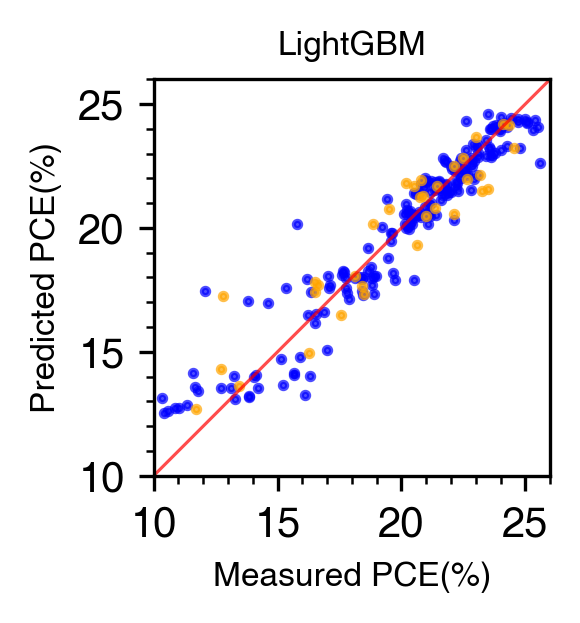

In [17]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, lgbm_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, lgbm_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('LightGBM')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [18]:
# catBoost
import warnings
warnings.filterwarnings('ignore')
from catboost import CatBoostRegressor
param_test1 =  {'max_depth':[2, 4, 6],
              'learning_rate':[0.1, 0.05, 0.001],
               'l2_leaf_reg':[1e-3,1e-2],
               'iterations':[50,30, 10],
}

cat = CatBoostRegressor(random_state=42)
gsearch=GridSearchCV(cat,param_grid=param_test1, scoring='neg_mean_squared_error',cv=10,n_jobs=8)
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)
cat=gsearch.best_estimator_
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, cat.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, cat.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, cat.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, cat.predict(x_test))[0]}")


0:	learn: 3.4414279	total: 142ms	remaining: 6.94s
1:	learn: 3.2384591	total: 142ms	remaining: 3.41s
2:	learn: 3.0363486	total: 142ms	remaining: 2.23s
3:	learn: 2.8676210	total: 143ms	remaining: 1.64s
4:	learn: 2.6878979	total: 143ms	remaining: 1.28s
5:	learn: 2.5558786	total: 143ms	remaining: 1.05s
6:	learn: 2.4485577	total: 143ms	remaining: 880ms
7:	learn: 2.3098193	total: 144ms	remaining: 754ms
8:	learn: 2.2175621	total: 144ms	remaining: 655ms
9:	learn: 2.1571192	total: 144ms	remaining: 576ms
10:	learn: 2.0845520	total: 144ms	remaining: 511ms
11:	learn: 1.9820807	total: 144ms	remaining: 457ms
12:	learn: 1.9282726	total: 145ms	remaining: 412ms
13:	learn: 1.8345356	total: 145ms	remaining: 372ms
14:	learn: 1.7675589	total: 145ms	remaining: 338ms
15:	learn: 1.7201342	total: 145ms	remaining: 309ms
16:	learn: 1.6838909	total: 145ms	remaining: 282ms
17:	learn: 1.6498518	total: 146ms	remaining: 259ms
18:	learn: 1.6068731	total: 146ms	remaining: 238ms
19:	learn: 1.5819297	total: 146ms	remaini

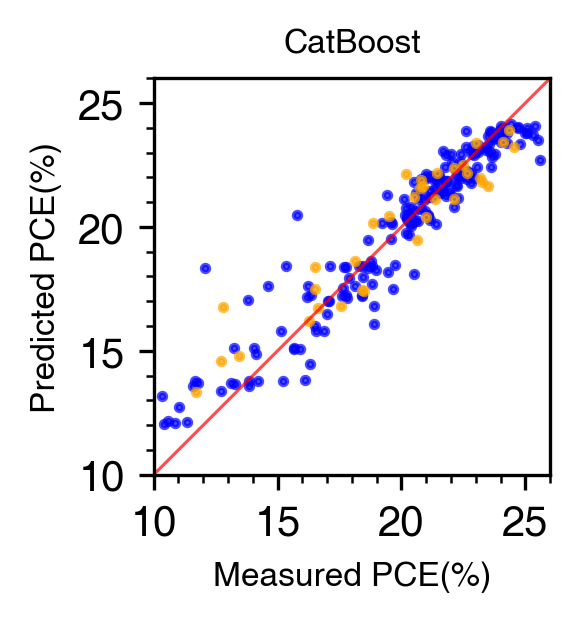

In [19]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, cat.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, cat.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('CatBoost')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [20]:
# Xgboost and SHAP
import xgboost as xgb
param_test1 =  {'learning_rate': [0.05],
              'n_estimators': [150],
              'max_depth': [3,5], 
              'min_child_weight': [3,2], 
              'subsample': [0.6],
              'colsample_bytree': [0.4,0.6],
              'gamma': [0.1], 
               'reg_alpha': [0.05,0.1], 
               'reg_lambda': [0.01,0.05,0.1],
   }
other_params={'objective': 'reg:squarederror',
              'seed': 0,
    }
model = xgb.sklearn.XGBRegressor(**other_params)
gsearch=GridSearchCV(model,param_grid=param_test1, scoring='neg_mean_squared_error',cv=10,n_jobs=8,verbose=4)
gsearch.fit(x_train, y_train)
xgb_model = gsearch.best_estimator_
print(gsearch.best_score_)
print(gsearch.best_params_)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, xgb_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, xgb_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, xgb_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, xgb_model.predict(x_test))[0]}")

Fitting 10 folds for each of 48 candidates, totalling 480 fits
-2.1859752465922897
{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 150, 'reg_alpha': 0.05, 'reg_lambda': 0.05, 'subsample': 0.6}
RMSE_train: 0.5977659747074923
R_train: 0.9871036771244749
RMSE_test: 1.2384188410595414
R_test: 0.9370347235791395


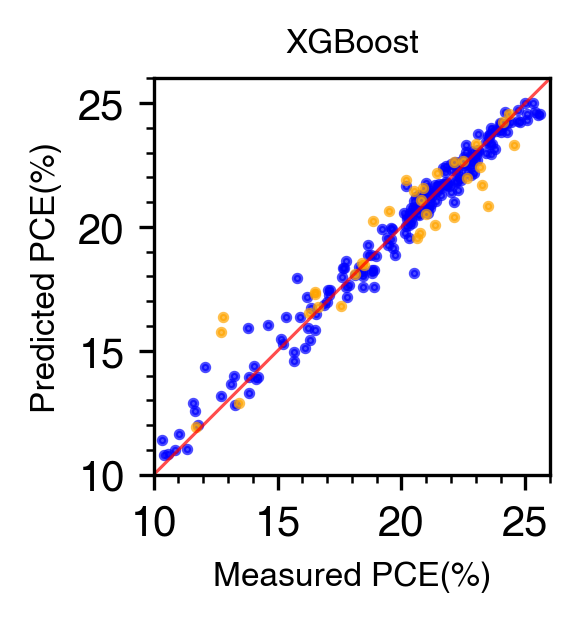

In [21]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, xgb_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, xgb_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('XGBoost')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [22]:
# HGBoost
from sklearn.ensemble import HistGradientBoostingRegressor as HGBoost
param_test1 =  {'learning_rate': [0.1],
              'max_depth': [3,5], 
              'min_samples_leaf': [10,20,30], 
              'max_leaf_nodes': [10, 20, 30],
              'max_features': [1.0], 
              'l2_regularization': [0.001,0.01], 
   }
model = HGBoost(random_state=3)
gsearch=GridSearchCV(model,param_grid=param_test1, scoring='neg_mean_squared_error',cv=10,n_jobs=8,verbose=4)
gsearch.fit(x_train, y_train)
hgb_model = gsearch.best_estimator_
print(gsearch.best_score_)
print(gsearch.best_params_)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, hgb_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, hgb_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, hgb_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, hgb_model.predict(x_test))[0]}")

Fitting 10 folds for each of 36 candidates, totalling 360 fits
-2.2636386282584042
{'l2_regularization': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 1.0, 'max_leaf_nodes': 10, 'min_samples_leaf': 20}
RMSE_train: 0.678398964211231
R_train: 0.9830084982951144
RMSE_test: 1.1620352678900008
R_test: 0.9431793880183534


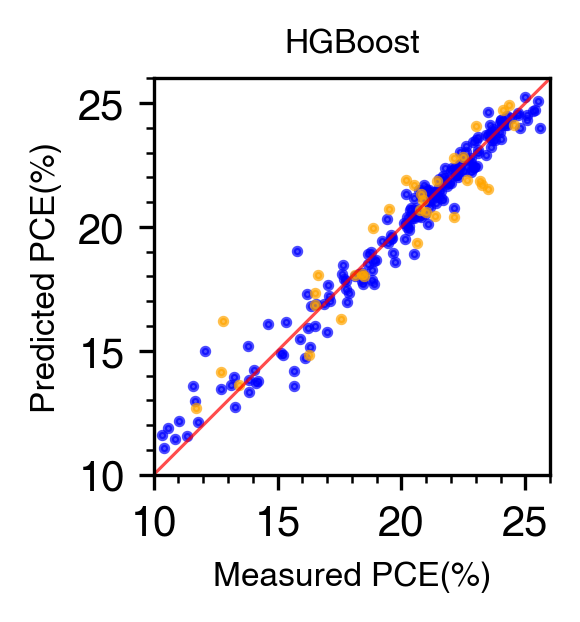

In [23]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, hgb_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, hgb_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('HGBoost')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [24]:
# NGBoost (Natural Gradient Boosting )
from ngboost import NGBRegressor
param_test1 =  {'max_depth': [3,5], 
              'min_samples_leaf': [10,20,30], 
              'max_leaf_nodes': [10, 20, 30],
              'minibatch_frac': [1.0, 0.5],
   }
model = NGBRegressor(random_state=3)
gsearch=GridSearchCV(model,param_grid=param_test1, scoring='neg_mean_squared_error',cv=10,n_jobs=8,verbose=4)
gsearch.fit(x_train, y_train)
ngb_model = gsearch.best_estimator_
print(gsearch.best_score_)
print(gsearch.best_params_)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, ngb_model.predict(x_train)))}")
print(f"R_train: {stats.pearsonr(y_train, ngb_model.predict(x_train))[0]}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, ngb_model.predict(x_test)))}")
print(f"R_test: {stats.pearsonr(y_test, ngb_model.predict(x_test))[0]}")

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[iter 0] loss=2.7187 val_loss=0.0000 scale=1.0000 norm=3.0099
[iter 100] loss=1.7107 val_loss=0.0000 scale=2.0000 norm=1.9758
[iter 200] loss=1.0774 val_loss=0.0000 scale=2.0000 norm=1.4622
[iter 300] loss=0.7446 val_loss=0.0000 scale=1.0000 norm=0.6445
[iter 400] loss=0.5795 val_loss=0.0000 scale=1.0000 norm=0.5957
-1.975506708535375
{'max_depth': 3, 'max_leaf_nodes': 30, 'min_samples_leaf': 20, 'minibatch_frac': 1.0}
RMSE_train: 0.5166199437538535
R_train: 0.990469990141796
RMSE_test: 1.2416718835163354
R_test: 0.9410489520014433


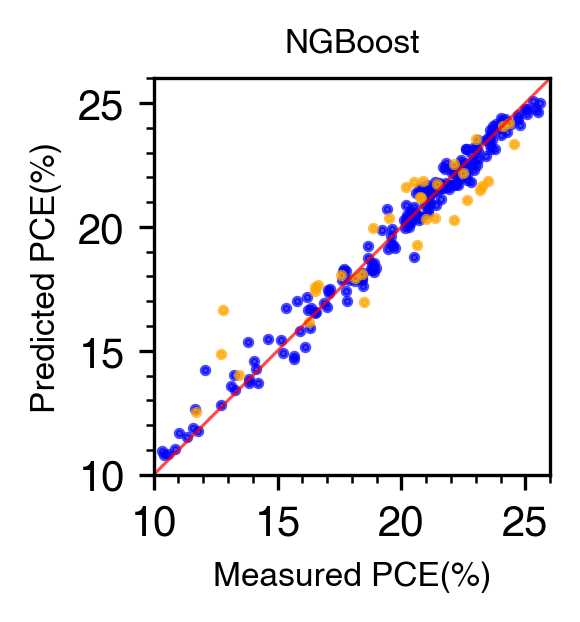

In [25]:
fig = plt.figure(dpi=300,figsize=(1.75,1.75))
ax = fig.add_subplot(111)
ax.scatter(y_train, ngb_model.predict(x_train), color='blue',alpha=0.7,s=3)
ax.scatter(y_test, ngb_model.predict(x_test), color='orange',alpha=0.7,s=3)
ax.plot([5,26],[5,26],'-r',alpha=0.7)
ax.set_aspect('equal')
ax.set_title('NGBoost')
ax.minorticks_on()
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('Measured PCE(%)')
plt.ylabel('Predicted PCE(%)')
plt.xlim(10,26)
plt.ylim(10,26)
plt.show()

In [26]:
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(dfX)
# print(shap_values.shape)
# shap.summary_plot(shap_values,dfX)

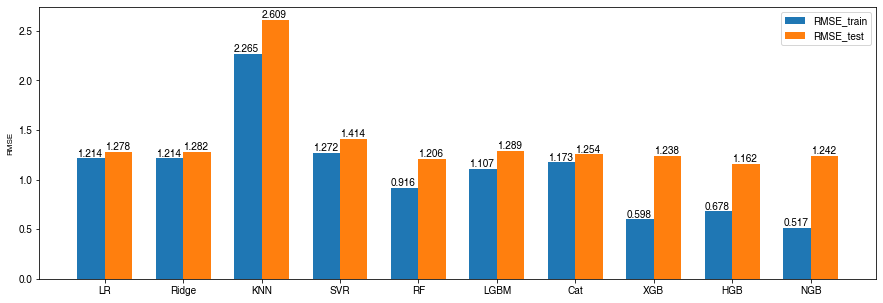

In [27]:
import matplotlib.pyplot as plt

models = ['LR', 'Ridge', 'KNN','SVR','RF','LGBM','Cat','XGB','HGB','NGB']
mods = [LR_model, ridge,KNN_model, SVR_model,rf_model,lgbm_model,cat,xgb_model,hgb_model,ngb_model]
# RMSE_train
rmse_train = [np.sqrt(mean_squared_error(y_train, model.predict(x_train))) for model in mods]
# RMSE_test
rmse_test = [np.sqrt(mean_squared_error(y_test, model.predict(x_test))) for model in mods]
index = np.arange(len(models))
bar_width = 0.35
plt.figure(figsize=(15,5))
train_bars = plt.bar(index, rmse_train, bar_width, label='RMSE_train')
test_bars = plt.bar(index + bar_width, rmse_test, bar_width, label='RMSE_test')
for bars in [train_bars, test_bars]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval, round(yval, 3), va='bottom')
plt.xticks(index + bar_width / 2, models)
plt.ylabel('RMSE')
plt.legend()
plt.show()

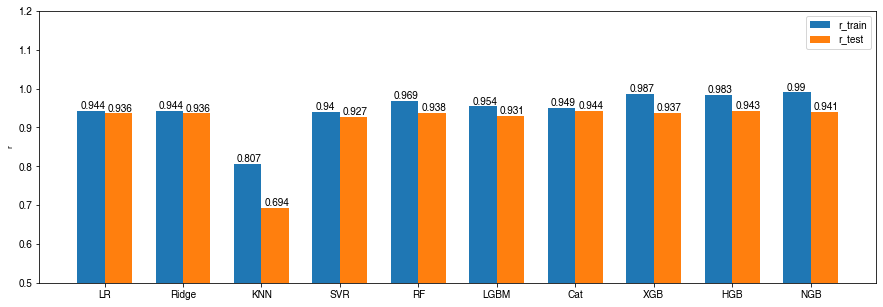

In [28]:
# r_train
r_train = [stats.pearsonr(y_train, model.predict(x_train))[0] for model in mods]

# r_test
r_test = [stats.pearsonr(y_test, model.predict(x_test))[0] for model in mods]

index = np.arange(len(models))
bar_width = 0.35
plt.figure(figsize=(15,5))
train_bars = plt.bar(index, r_train, bar_width, label='r_train')
test_bars = plt.bar(index + bar_width, r_test, bar_width, label='r_test')

for bars in [train_bars, test_bars]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/9, yval, round(yval, 3), va='bottom')
plt.xticks(index + bar_width / 2, models)
plt.ylabel('r')
plt.ylim(0.5,1.2)
plt.legend()
plt.show()

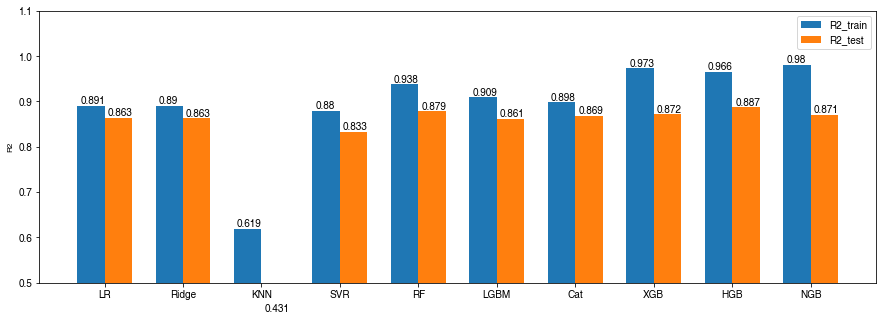

In [29]:
# R2_train
R2_train = [r2_score(y_train, model.predict(x_train)) for model in mods]

# R2_test
R2_test = [r2_score(y_test, model.predict(x_test)) for model in mods]
index = np.arange(len(models))
bar_width = 0.35
plt.figure(figsize=(15,5))
train_bars = plt.bar(index, R2_train, bar_width, label='R2_train')
test_bars = plt.bar(index + bar_width, R2_test, bar_width, label='R2_test')
for bars in [train_bars, test_bars]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/9, yval, round(yval, 3), va='bottom')
plt.xticks(index + bar_width / 2, models)
plt.ylabel('R2')
plt.ylim(0.5,1.1)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

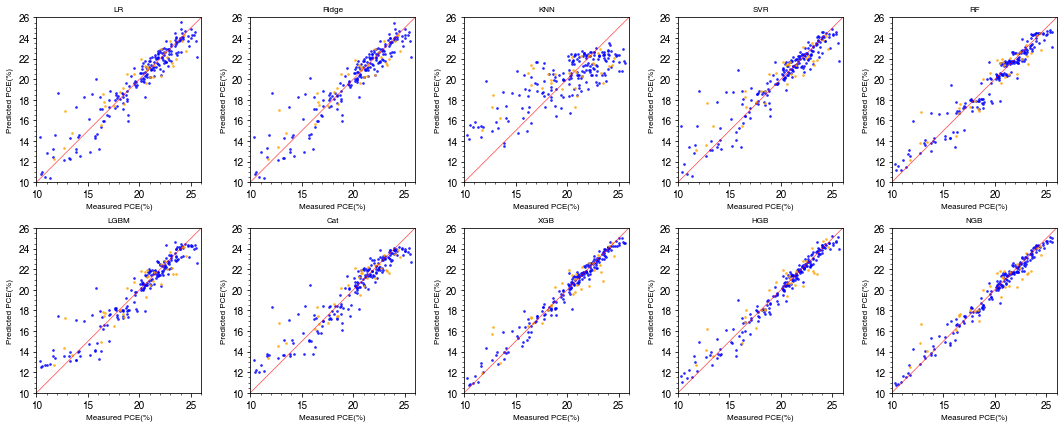

In [30]:
rows = 2
cols = int(np.ceil(len(models)/rows))
fig = plt.figure()
fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
i = 0
for model,name in zip(mods,models):
    ax = axes.flat[i]
    ax.scatter(y_train, model.predict(x_train), color='blue',alpha=0.7,s=3)
    ax.scatter(y_test, model.predict(x_test), color='orange',alpha=0.7,s=3)
    ax.plot([5,26],[5,26],'-r',alpha=0.7)
    ax.set_aspect('equal')
    ax.set_title(f'{name}')
    ax.minorticks_on()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
    ax.set_xlabel('Measured PCE(%)')
    ax.set_ylabel('Predicted PCE(%)')
    ax.set_xlim(10,26)
    ax.set_ylim(10,26)
    i += 1
plt.tight_layout()
plt.show()